In [1]:
import json
import os
from copy import deepcopy
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

## 1. amino acid composition

frequency of single AA

In [3]:
from utils import Utils
from aa_comp import AAComp

data_iter = Utils.get_data()
aa_data, num_pro, num_epi = AAComp.isolate_epitope_seq(data_iter)
outfile = '../data/epitopes_aa.json'
with open(outfile, 'w') as f:
    json.dump(aa_data, f, indent=4, sort_keys=True)

Number of proteins = 68940
Number of epitopes = 1786566


In [4]:
from collections import Counter

epi_counts, epi_len = Counter(), 0
other_counts, other_len = Counter(), 0
for acc in aa_data:
    epi_seq = aa_data[acc]['epitope_seq']
    other_seq = aa_data[acc]['other_seq']
    epi_counts += Counter(epi_seq)
    other_counts += Counter(other_seq)
    epi_len += len(epi_seq)
    other_len += len(other_seq)
print(f"Number of antigens: {len(aa_data)}")
print(epi_len, other_len)

Number of antigens: 68940
6690573 34595695


In [5]:
from constants import AA, PROPERTY

aa_names = list(AA)
df = pd.DataFrame({
    'other': [other_counts.get(i, 1) for i in aa_names],
    'epitope': [epi_counts.get(i, 1) for i in aa_names],
    'aa': list(AA),
    'hydrophobicity_index': [AA[k]['hydrophobicity'] for k in aa_names],
    'hydrophobicity': [float(PROPERTY[k]['hydrophobicity']) for k in aa_names],
    'polarity': [float(PROPERTY[k]['polarity']) for k in aa_names],
    'polarizability': [float(PROPERTY[k]['polarizability']) for k in aa_names],
    'van_der_Waals_volume': [float(PROPERTY[k]['van_der_Waals_volume']) for k in aa_names],
})
df['other'] = df['other']*100/other_len
df['epitope'] = df['epitope']*100/epi_len
# set position of display
df['other_bias'] = df['other']
df['epitope_bias'] = df['epitope']
# R
df.loc[1,'other_bias'] -= 0.25
# K
df.loc[11,'other_bias'] -= 0.15
df.loc[11,'epitope_bias'] += 0.15
# P
df.loc[14,'other_bias'] += 0.1
df.loc[14,'epitope_bias'] -= 0.1
df

,other,epitope,aa,hydrophobicity_index,hydrophobicity,polarity,polarizability,van_der_Waals_volume,other_bias,epitope_bias
0,7.281287,8.144624,A,41,0.61,8.1,0.046,1.00,7.281287,8.144624
1,5.525572,5.514386,R,-14,0.60,10.5,0.291,6.13,5.275572,5.514386
2,4.063506,3.676875,N,-28,0.06,11.6,0.134,2.95,4.063506,3.676875
3,5.148626,4.624836,D,-55,0.46,13.0,0.105,2.78,5.148626,4.624836
4,2.095839,1.039657,C,49,1.07,5.5,0.128,2.43,2.095839,1.039657
5,6.956938,6.614815,E,-31,0.47,12.3,0.151,3.78,6.956938,6.614815
6,4.547687,4.400759,Q,-10,0.00,10.5,0.180,3.95,4.547687,4.400759
7,6.685335,6.203370,G,0,0.07,9.0,0.000,0.00,6.685335,6.203370
8,2.464061,2.415638,H,8,0.61,10.4,0.230,4.66,2.464061,2.415638
9,4.671038,5.141697,I,99,2.22,5.2,0.186,4.00,4.671038,5.141697


In [6]:
df.dtypes

other                   float64
epitope                 float64
aa                       object
hydrophobicity_index      int64
hydrophobicity          float64
polarity                float64
polarizability          float64
van_der_Waals_volume    float64
other_bias              float64
epitope_bias            float64
dtype: object

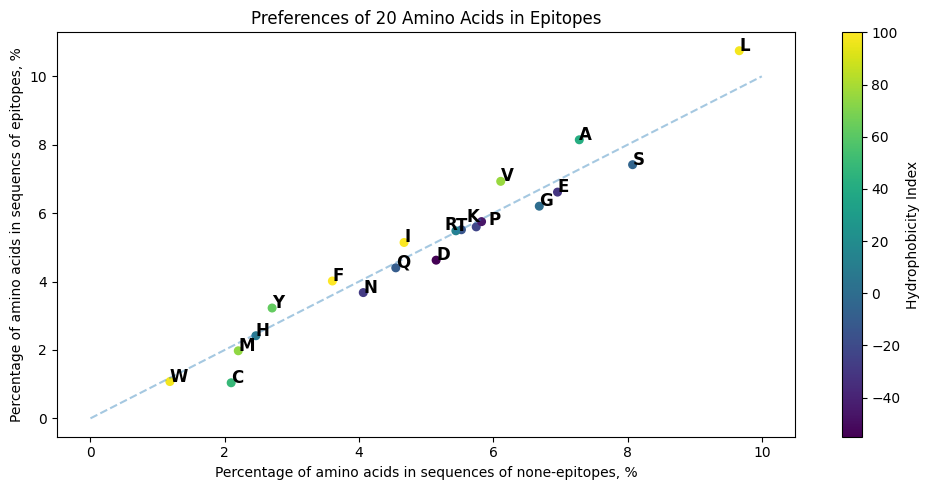

In [7]:
fig, ax = plt.subplots(1, figsize=(10, 5), layout='tight')

scatter = ax.scatter(df['other'], df['epitope'], s=30, c=df['hydrophobicity_index'])
cbar = fig.colorbar(scatter)
cbar.set_label('Hydrophobicity Index')
ax.set_title(f'Preferences of {len(AA)} Amino Acids in Epitopes')
ax.set_xlabel('Percentage of amino acids in sequences of none-epitopes, %')
ax.set_ylabel('Percentage of amino acids in sequencs of epitopes, %')
ax.plot([0,10], [0,10], linestyle='--', alpha=.4)
for (a, b, s) in zip(df['other_bias'], df['epitope_bias'], df['aa']):
    ax.text(a, b, s, fontsize=12, fontweight='bold')

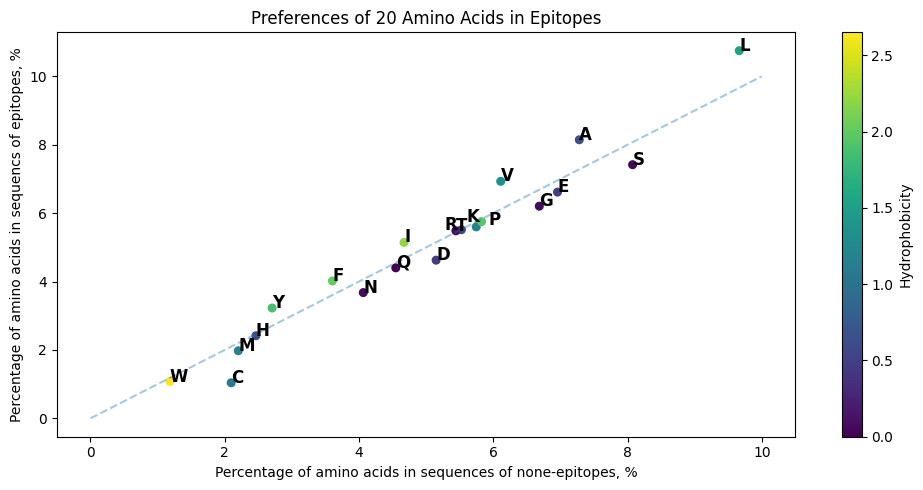

In [8]:
fig, ax = plt.subplots(1, figsize=(10, 5), layout='tight')

scatter = ax.scatter(df['other'], df['epitope'], s=30, c=df['hydrophobicity'])
cbar = fig.colorbar(scatter)
cbar.set_label('Hydrophobicity')
ax.set_title(f'Preferences of {len(AA)} Amino Acids in Epitopes')
ax.set_xlabel('Percentage of amino acids in sequences of none-epitopes, %')
ax.set_ylabel('Percentage of amino acids in sequencs of epitopes, %')
ax.plot([0,10], [0,10], linestyle='--', alpha=.4)
for (a, b, s) in zip(df['other_bias'], df['epitope_bias'], df['aa']):
    ax.text(a, b, s, fontsize=12, fontweight='bold')

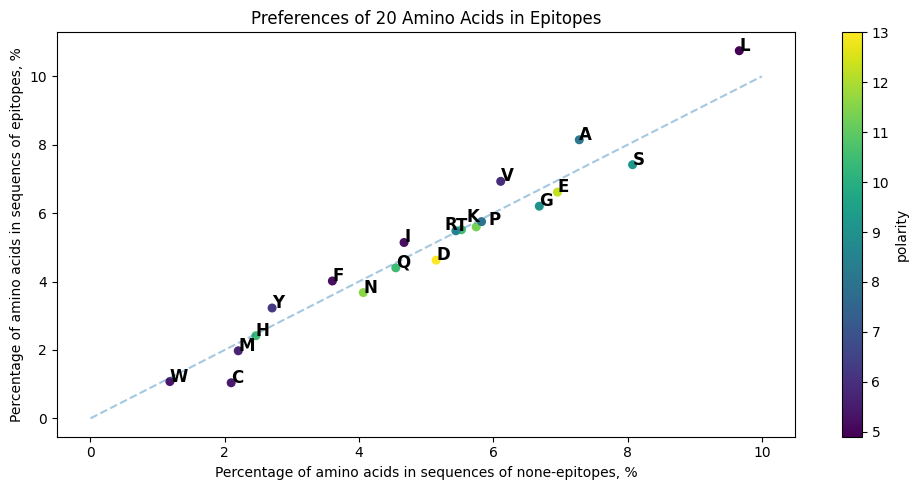

In [9]:
fig, ax = plt.subplots(1, figsize=(10, 5), layout='tight')

scatter = ax.scatter(df['other'], df['epitope'], s=30, c=df['polarity'])
cbar = fig.colorbar(scatter)
cbar.set_label('polarity')
ax.set_title(f'Preferences of {len(AA)} Amino Acids in Epitopes')
ax.set_xlabel('Percentage of amino acids in sequences of none-epitopes, %')
ax.set_ylabel('Percentage of amino acids in sequencs of epitopes, %')
ax.plot([0,10], [0,10], linestyle='--', alpha=.4)
for (a, b, s) in zip(df['other_bias'], df['epitope_bias'], df['aa']):
    ax.text(a, b, s, fontsize=12, fontweight='bold')

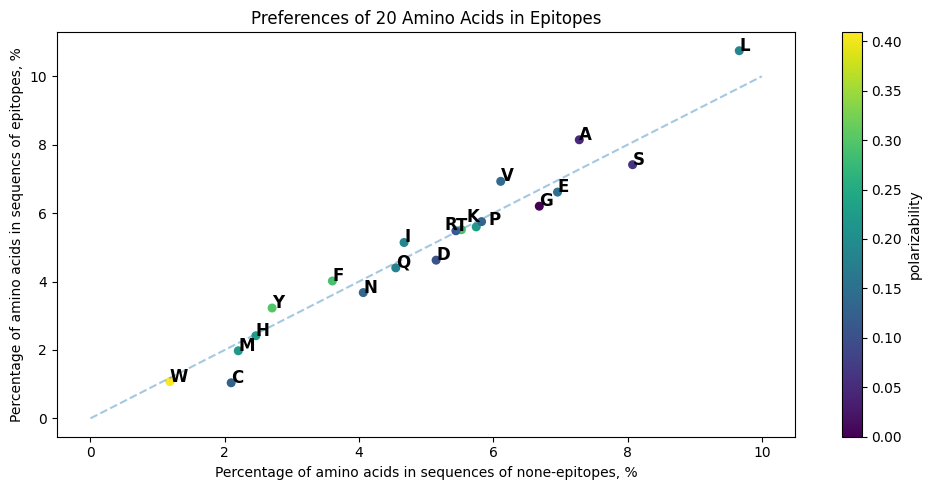

In [10]:
fig, ax = plt.subplots(1, figsize=(10, 5), layout='tight')

scatter = ax.scatter(df['other'], df['epitope'], s=30, c=df['polarizability'])
cbar = fig.colorbar(scatter)
cbar.set_label('polarizability')
ax.set_title(f'Preferences of {len(AA)} Amino Acids in Epitopes')
ax.set_xlabel('Percentage of amino acids in sequences of none-epitopes, %')
ax.set_ylabel('Percentage of amino acids in sequencs of epitopes, %')
ax.plot([0,10], [0,10], linestyle='--', alpha=.4)
for (a, b, s) in zip(df['other_bias'], df['epitope_bias'], df['aa']):
    ax.text(a, b, s, fontsize=12, fontweight='bold')

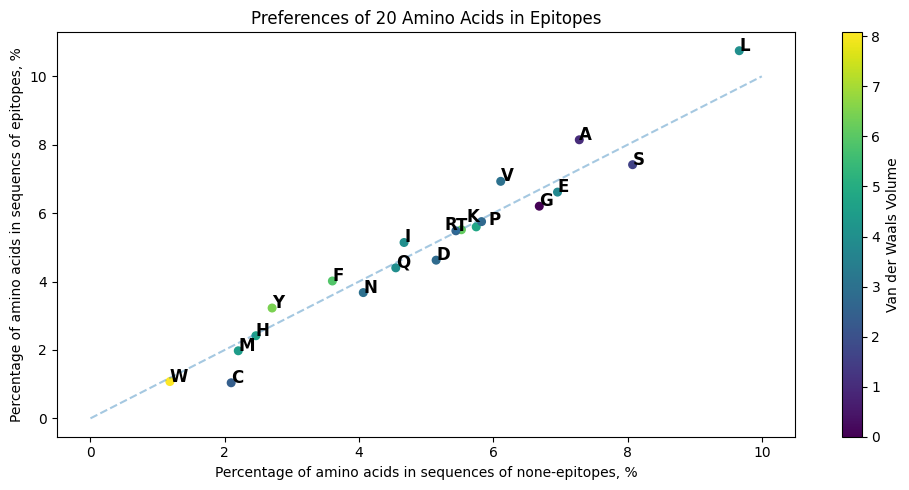

In [11]:
fig, ax = plt.subplots(1, figsize=(10, 5), layout='tight')

scatter = ax.scatter(df['other'], df['epitope'], s=30, c=df['van_der_Waals_volume'])
cbar = fig.colorbar(scatter)
cbar.set_label('Van der Waals Volume')
ax.set_title(f'Preferences of {len(AA)} Amino Acids in Epitopes')
ax.set_xlabel('Percentage of amino acids in sequences of none-epitopes, %')
ax.set_ylabel('Percentage of amino acids in sequencs of epitopes, %')
ax.plot([0,10], [0,10], linestyle='--', alpha=.4)
for (a, b, s) in zip(df['other_bias'], df['epitope_bias'], df['aa']):
    ax.text(a, b, s, fontsize=12, fontweight='bold')

## 2. composition of two AA

In [41]:
from utils import Utils
from aa_comp import AAComp

# iterate data
data_iter = Utils.get_data()
epi_counts, total_epi, other_counts, total_other = AAComp.retrieve_epitope_2aa(data_iter)

In [40]:
from constants import AA

sorted(AA.items(), key=lambda x: x[1]['hydrophobicity'], reverse=True)

[('F', {'abb': 'phe', 'hydrophobicity': 100}),
 ('I', {'abb': 'ile', 'hydrophobicity': 99}),
 ('L', {'abb': 'leu', 'hydrophobicity': 97}),
 ('W', {'abb': 'trp', 'hydrophobicity': 97}),
 ('V', {'abb': 'val', 'hydrophobicity': 76}),
 ('M', {'abb': 'met', 'hydrophobicity': 74}),
 ('Y', {'abb': 'tyr', 'hydrophobicity': 63}),
 ('C', {'abb': 'cys', 'hydrophobicity': 49}),
 ('A', {'abb': 'ala', 'hydrophobicity': 41}),
 ('T', {'abb': 'thr', 'hydrophobicity': 13}),
 ('H', {'abb': 'his', 'hydrophobicity': 8}),
 ('G', {'abb': 'gly', 'hydrophobicity': 0}),
 ('S', {'abb': 'ser', 'hydrophobicity': -5}),
 ('Q', {'abb': 'gln', 'hydrophobicity': -10}),
 ('R', {'abb': 'arg', 'hydrophobicity': -14}),
 ('K', {'abb': 'lys', 'hydrophobicity': -23}),
 ('N', {'abb': 'asn', 'hydrophobicity': -28}),
 ('E', {'abb': 'glu', 'hydrophobicity': -31}),
 ('P', {'abb': 'pro', 'hydrophobicity': -46}),
 ('D', {'abb': 'asp', 'hydrophobicity': -55})]

In [113]:
def aa2_hydrophobic(x, AA):
    a, b = AA.get(x[0], {}), AA.get(x[1], {})
    if a and b:
        return int(a['hydrophobicity'] + b['hydrophobicity'])
    return None

aa2 = list(epi_counts) + list(other_counts)
aa2 = list(set(aa2))
df = pd.DataFrame({
    'epitope': [epi_counts.get(i, 0) for i in aa2],
    'other': [other_counts.get(i, 0) for i in aa2],
    'aa': aa2,
    'hydrophobicity': [aa2_hydrophobic(x, AA) for x in aa2],
})
# percentage of 2-AA in epitopes and non-epitopes
df['epitope'] = df['epitope']*100/total_epi
df['other'] = df['other']*100/total_other
df['diff'] = df['epitope'] - df['other']

In [114]:
n = 20
# decreased
df=df.sort_values('diff')
decreased_df = df.iloc[:n]
print(decreased_df.head())
print()
# increased
df=df.sort_values('diff', ascending=False)
increased_df = df.iloc[:n]
print(increased_df.head())

      epitope     other  aa  hydrophobicity      diff
64   0.678507  0.872704  SS           -10.0 -0.194197
393  0.078932  0.182436  CS            44.0 -0.103504
7    0.469108  0.569660  GS            -5.0 -0.100553
373  0.101411  0.201106  CL           146.0 -0.099695
193  0.387784  0.486610  KK           -46.0 -0.098825

      epitope     other  aa  hydrophobicity      diff
154  0.948260  0.748865  AA            82.0  0.199395
139  0.894617  0.726934  AL           138.0  0.167683
195  1.143923  1.020959  LL           194.0  0.122964
68   0.716187  0.609868  VL           173.0  0.106319
89   0.591638  0.494160  AV           117.0  0.097479


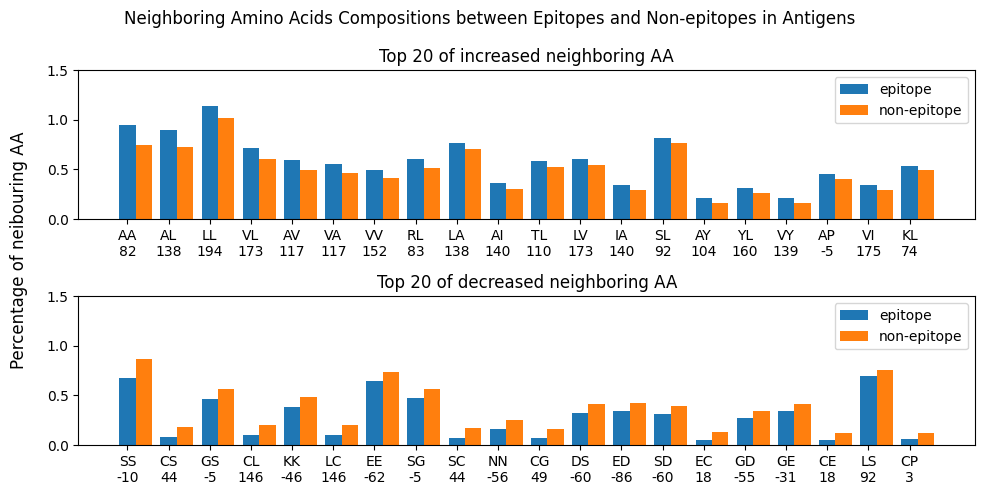

In [115]:
import seaborn as sns

fig, ax = plt.subplots(2,1, figsize=(10, 5), layout='tight')
fig.suptitle('Neighboring Amino Acids Compositions between Epitopes and Non-epitopes in Antigens')
fig.supylabel('Percentage of neibouring AA')
x = np.arange(n)
width = .4

i=0
ax1 = ax[i].bar(x, increased_df['epitope'], width=width, align='center', label='epitope')
ax[i].bar(x+width, increased_df['other'], width=width, align='center', label='non-epitope')
ax[i].set_title(f'Top {n} of increased neighboring AA')
ax[i].set(xlabel=None, ylabel=None)
ax[i].set_ylim(0, 1.5)
ax[i].legend(loc='upper right')
xl = [f"{a}\n{int(b)}" for a, b in zip(increased_df['aa'], increased_df['hydrophobicity'])]
ax[i].set_xticks(x, xl)

i=1
ax1 = ax[i].bar(x, decreased_df['epitope'], width=width, align='center', label='epitope')
ax[i].bar(x+width, decreased_df['other'], width=width, align='center', label='non-epitope')
ax[i].set_title(f'Top {n} of decreased neighboring AA')
ax[i].set(xlabel=None, ylabel=None)
ax[i].set_ylim(0, 1.5)
ax[i].legend(loc='upper right')
xl = [f"{a}\n{int(b)}" for a, b in zip(decreased_df['aa'], decreased_df['hydrophobicity'])]
ax[i].set_xticks(x, xl)




plt.show()

## 3. frequency of AA

### 1-AA

In [118]:
from utils import Utils
from aa_comp import AAComp

# iterate data
data_iter = Utils.get_data()
k=1
freq_1aa, num_epi = AAComp.retrieve_frequency(data_iter, k)
freq_1aa

,aa,counts,freq,hydrophobicity
0,L,1269401,70.569520,97.0
15,V,1072975,59.649654,76.0
10,A,1068821,59.418722,41.0
16,S,1056294,58.722311,-5.0
1,E,956314,53.164146,-31.0
14,G,934213,51.935490,0.0
4,T,924704,51.406858,13.0
9,K,921232,51.213840,-23.0
7,I,863706,48.015811,99.0
11,R,856919,47.638502,-14.0


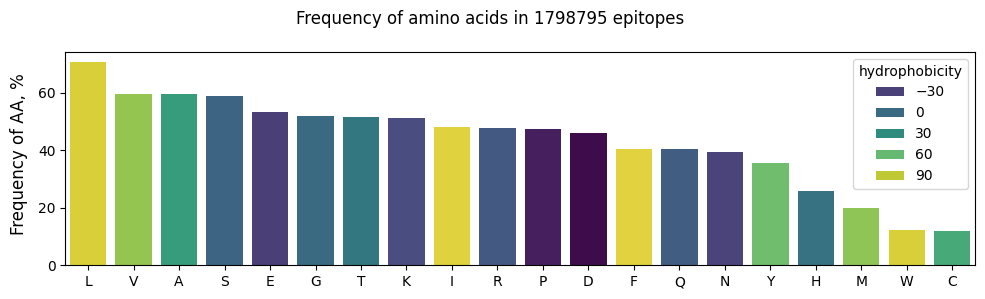

In [125]:
fig, ax = plt.subplots(1, figsize=(10,3), layout='tight')
fig.suptitle(f'Frequency of amino acids in {num_epi} epitopes')
fig.supylabel('Frequency of AA, %')

freq = freq_1aa
sns.barplot(data=freq, x='aa', y='freq', hue='hydrophobicity', palette='viridis')
ax.set(xlabel=None, ylabel=None)
plt.show()

### 2-AA

In [130]:
data_iter = Utils.get_data()
k=2
freq_2aa, num_epi = AAComp.retrieve_frequency(data_iter, k)
freq_2aa

,aa,counts,freq,hydrophobicity
166,LL,183517,10.202219,194.0
183,AL,166267,9.243243,138.0
179,AA,159882,8.888284,82.0
79,SL,156527,8.701770,92.0
102,VL,144947,8.058005,173.0
...,...,...,...,...
294,WM,4670,0.259618,171.0
398,WC,4632,0.257506,146.0
399,CM,4529,0.251780,123.0
388,CW,3313,0.184179,146.0


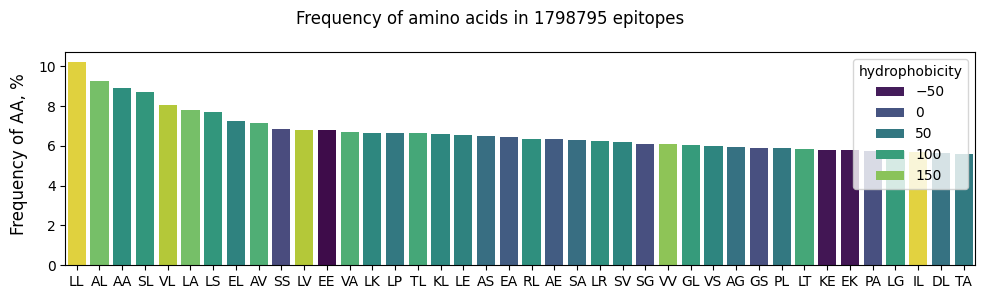

In [129]:
fig, ax = plt.subplots(1, figsize=(10,3), layout='tight')
fig.suptitle(f'Frequency of amino acids in {num_epi} epitopes')
fig.supylabel('Frequency of AA, %')

freq = freq_2aa.iloc[:40,:]
sns.barplot(freq, x='aa', y='freq', hue='hydrophobicity', palette='viridis')
ax.set(xlabel=None, ylabel=None)
plt.show()

### 3-AA

In [131]:
data_iter = Utils.get_data()
k=3
freq_3aa, num_epi = AAComp.retrieve_frequency(data_iter, k)
freq_3aa

,aa,counts,freq,hydrophobicity
2439,AAA,24377,1.355185,123.0
1736,LLL,19600,1.089618,291.0
1671,AAL,16999,0.945022,179.0
2055,ALL,16323,0.907441,235.0
3515,LAA,15494,0.861354,179.0
...,...,...,...,...
7952,WWM,23,0.001279,268.0
7993,CWM,17,0.000945,220.0
7391,CWW,16,0.000889,243.0
7989,MCW,14,0.000778,220.0


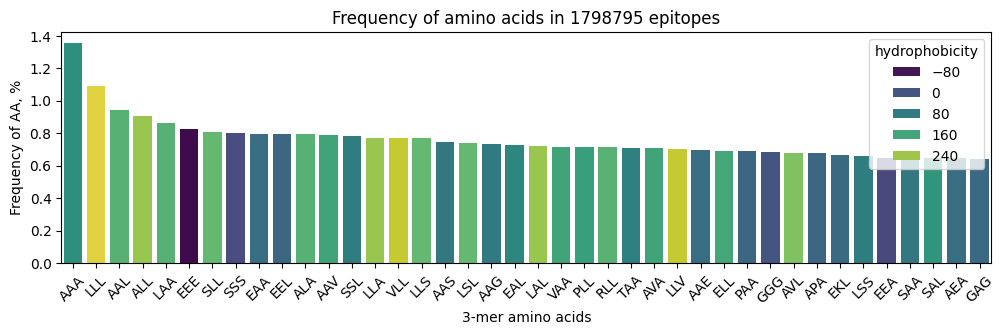

In [132]:
plt.figure(figsize=(12,3))
plt.title(f'Frequency of amino acids in {num_epi} epitopes')
plt.ylabel('Frequency of AA, %')
plt.xlabel('3-mer amino acids')

freq = freq_3aa.iloc[:40,:]
sns.barplot(freq, x='aa', y='freq', hue='hydrophobicity', palette='viridis')
plt.xticks(rotation=45)
plt.show()